# Supplemental figures

In [1]:
%run _define_model_class.ipynb
%run _define_plotting_class.ipynb

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# plotting
import cmocean as cm
import matplotlib.pyplot as plt
from plotting_tools.spatial_map import SpatialMap
from plotting_tools.time_series_diagram import TimeSeriesPlot
import cartopy.crs as ccrs
from matplotlib.ticker import AutoMinorLocator
import cartopy.feature as cfeature

# Warning: Using an implicitly registered datetime converter for a matplotlib plotting method
# The converter was registered by pandas on import. 
# Future versions of pandas will require you to explicitly register matplotlib converters
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# load data

In [3]:
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

ds = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_stats/stats_FCO2_*_SOMFFN.nc', 
                       concat_dim='member', 
                       combine='nested')

#dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

#ds_stats = xr.open_mfdataset(f'{dir_clean}/CO2_flux-float_stats/stats_FCO2_*_SOMFFN.nc', 
#                       concat_dim='ensemble', 
#                       combine='nested')

In [4]:
ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')


# magnitude of signals

In [5]:
#ds_decompM['F_member'].sel(ensemble=0, lat=0.5, lon=240.5)
#dec = ds_decompM['F_member_dec'].sel(ensemble=0, lat=0.5, lon=240.5)
#seasonal = ds_decompM['F_member_seasonal'].sel(ensemble=0, lat=0.5, lon=240.5)
#residual = ds_decompM['F_member_residual'].sel(ensemble=0, lat=0.5, lon=240.5)

In [12]:
time = ds_decompM['time']

In [11]:
dec_trop = ds_decompM['F_member_dec'].sel(lat=slice(-35,35)).mean('ensemble').mean(['lon','lat']).values
dec_NH = ds_decompM['F_member_dec'].sel(lat=slice(35,90)).mean('ensemble').mean(['lon','lat']).values

seas_trop = ds_decompM['F_member_seasonal'].sel(lat=slice(-35,35)).mean('ensemble').mean(['lon','lat']).values
seas_NH = ds_decompM['F_member_seasonal'].sel(lat=slice(35,90)).mean('ensemble').mean(['lon','lat']).values

subdec_trop = ds_decompM['F_member_residual'].sel(lat=slice(-35,35)).mean('ensemble').mean(['lon','lat']).values
subdec_NH = ds_decompM['F_member_residual'].sel(lat=slice(35,90)).mean('ensemble').mean(['lon','lat']).values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

## Northern Hemisphere

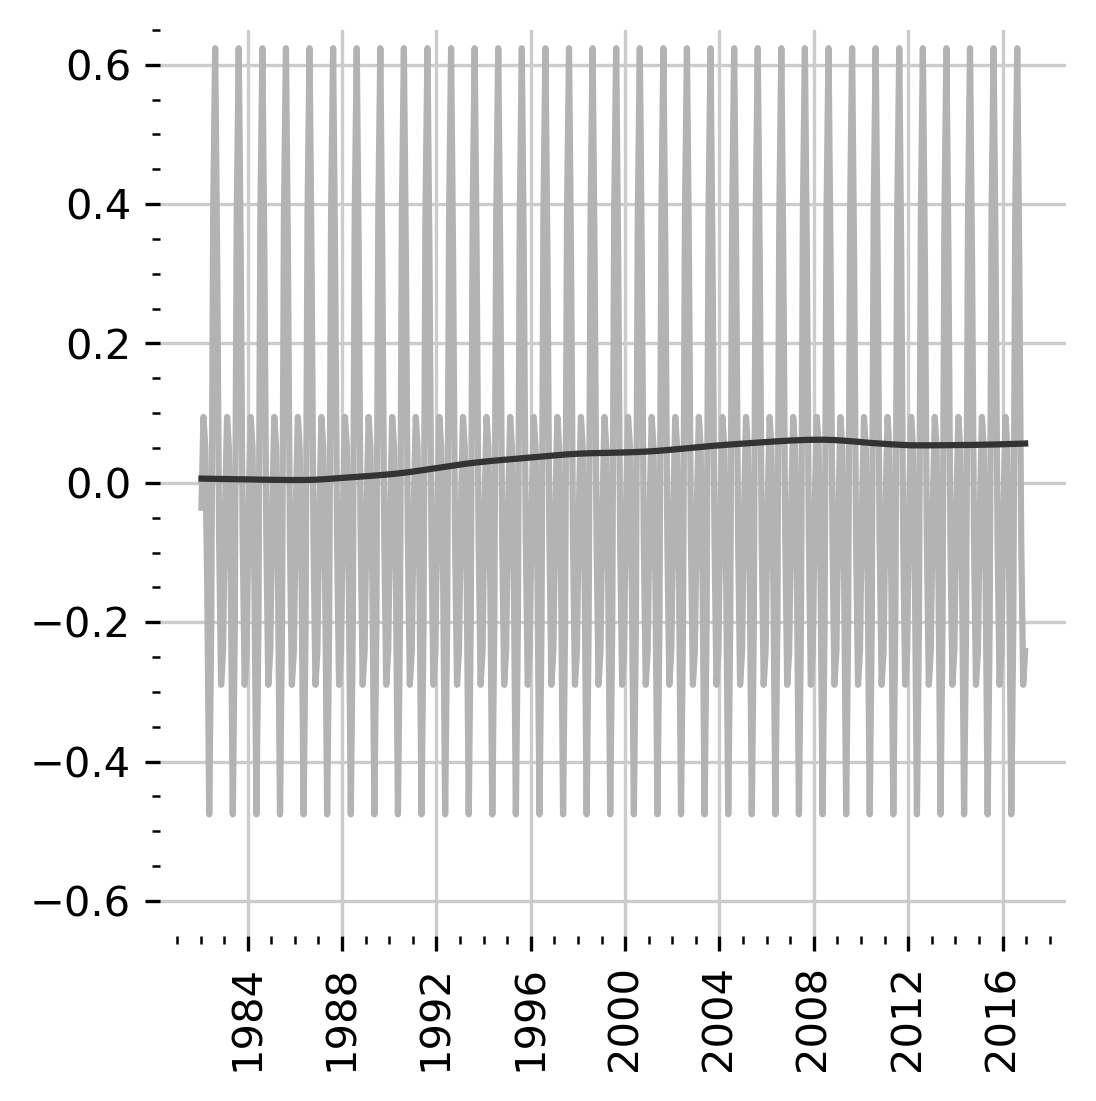

In [35]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [-0.65, 0.65, 0.25]

# one-to-one line
#ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

ax.plot(time, seas_NH, color=[0.7,0.7,0.7])
ax.plot(time, dec_NH, color=[0.2,0.2,0.2])

    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
#ax.set_ylabel('Amplitude')
#ax.set_xlabel('Ensemble member STD')

# axis limits
#ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
#ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
#ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
ax.tick_params(axis='x', which='both', rotation=90) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')
#ax.ax.xticks(rotation=90)

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)

## tropics

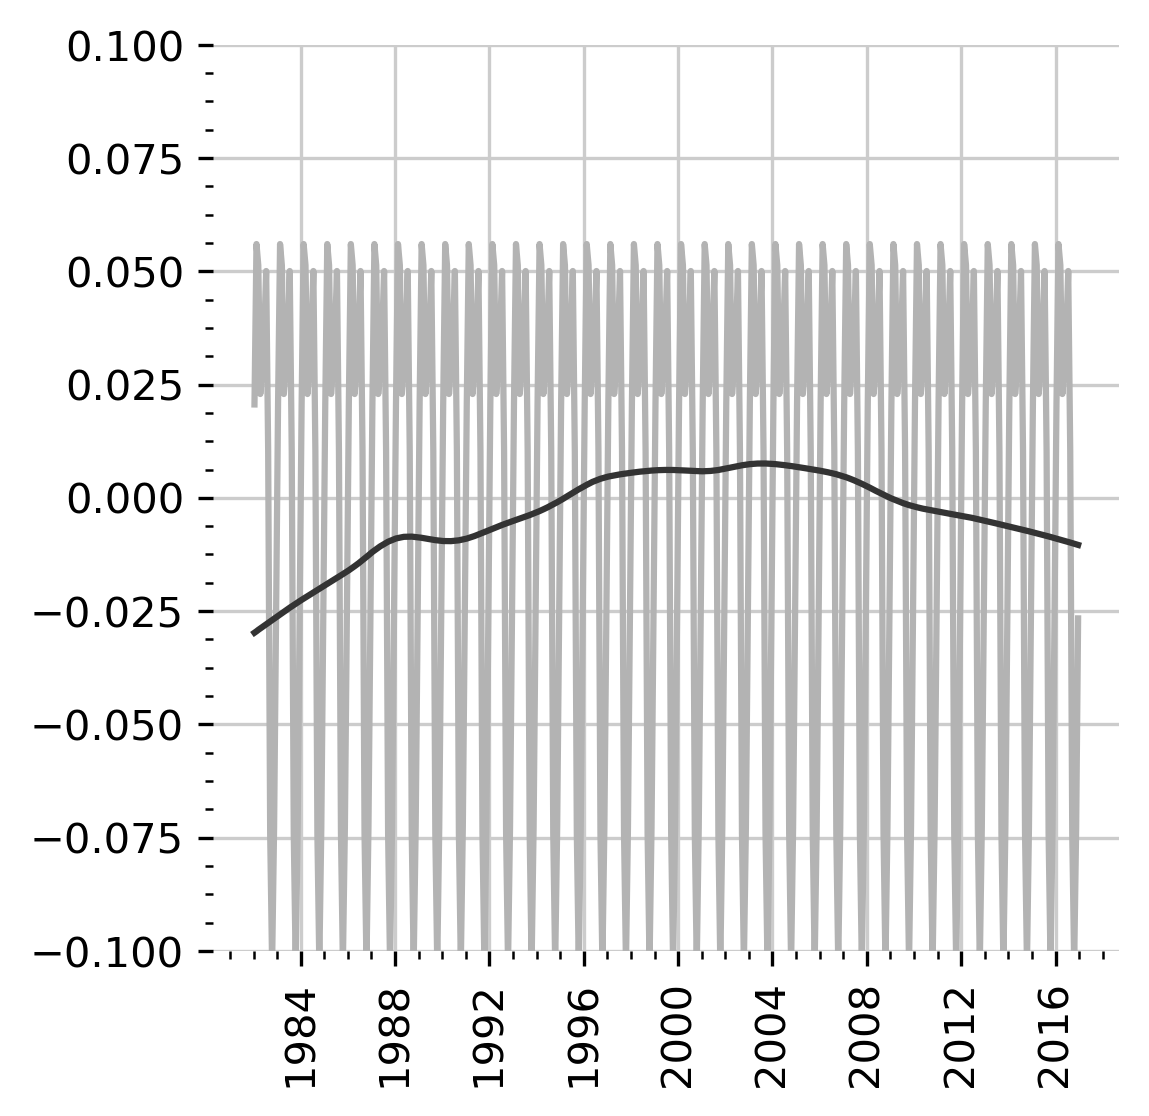

In [36]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [-0.15, 0.1, 0.25]

# one-to-one line
#ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

ax.plot(time, seas_trop, color=[0.7,0.7,0.7])
ax.plot(time, dec_trop, color=[0.2,0.2,0.2])

    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
#ax.set_ylabel('Amplitude')
#ax.set_xlabel('Ensemble member STD')

# axis limits
#ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
#ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
#ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
ax.tick_params(axis='x', which='both', rotation=90) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')
#ax.ax.xticks(rotation=90)

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
#leg = ax.legend(frameon=False)

In [23]:
seas_NH.std() / dec_NH.std()

14.73346446190729

In [24]:
seas_trop.std() / dec_trop.std()

5.6747035839837725

In [31]:
amp = seas_NH.max('time') - seas_NH.min('time')
amp.values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(1.09928698)

In [40]:
amp = seas_trop.std('time')  / dec_trop.std('time')

In [41]:
amp.values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(5.67470358)

In [39]:
amp.values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(14.73346446)

In [32]:
amp = dec_NH.max('time') - dec_NH.min('time')
amp.values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(0.05788238)

In [33]:
1.09928698/0.05788238

18.99173772743968

In [34]:
amp = seas_trop.max('time') - seas_trop.min('time')
amp.values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(0.15892863)

In [35]:
amp = dec_trop.max('time') - dec_trop.min('time')
amp.values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(0.03735553)

In [36]:
0.15892863/0.03735553

4.254487354348874

In [ ]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [0, 0.25, 0.05]

# lats and stat
lats = [-90,-35]
stat = 'dec'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])
 
colors = {'CESM':'#DF8E5B',      # light blue
          'MPI':'#A16EA5',   # dark blue
          'GFDL':'#A3C7F3',      # light green
          'CanESM':'#102A83'}       # dark green

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model, c=colors[model])
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('Reconstructed STD')
ax.set_xlabel('Ensemble member STD')

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
leg = ax.legend(frameon=False)

# Scatter plot separated by model
The phasing of sub-decadal and decadal component outside of the tropics may be difficult for the neural network to capture because it is obscured by the strong extratropical seasonal cycle. The amplitude of the seasonal cycle is 15 times greater than the decadal amplitude in the Northern Hemisphere as opposed to being 5 times greater in the tropics. 

In [29]:
ds_sigmaM = ds_decompM['F_member_seasonal'].std('time')
sigmaM = ds_sigmaM.sel(lat=slice(-90,-35)).mean(['lat','lon']).values
sigmaM.max()

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: 

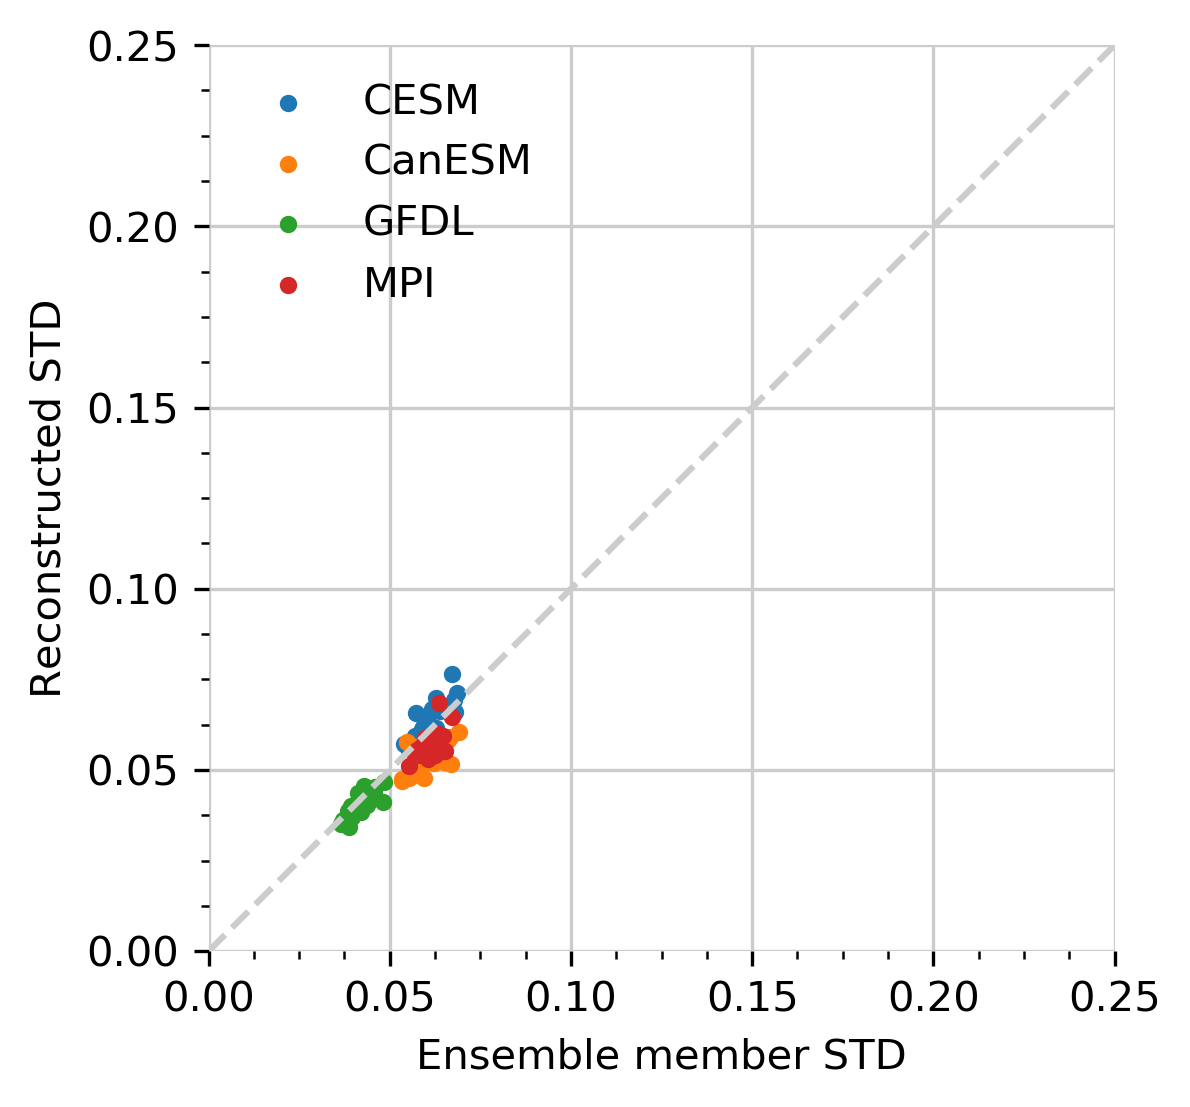

In [55]:
fig = plt.figure(dpi=300) 
ax = fig.add_subplot(111)

# axis limits
ax_lims = [0, 0.25, 0.05]

# lats and stat
lats = [-35,35]
stat = 'dec'

# one-to-one line
ax.plot([0,10],[0,10],'--', color=[0.8,0.8,0.8])

#-------------------------
# Plot data
#-------------------------
dir_clean='/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'

for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    # load data
    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # plot scatter
    ax.scatter(sigmaM, sigmaR, s=10, label=model)
    
# Test plot
#sigmaM, sigmaR = [1,2,3,4], [3,2,5,6]
#ax.scatter(sigmaM, sigmaR, label='test')
    
# ***********************************************************************
# Figures settings are below here
# ***********************************************************************
# Labels
ax.set_ylabel('Reconstructed STD')
ax.set_xlabel('Ensemble member STD')

# axis limits
ax.set_xticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))
ax.set_yticks(np.arange(ax_lims[0], ax_lims[1]+ax_lims[2], ax_lims[2]))

# Set limts
ax.set_ylim([ax_lims[0], ax_lims[1]])
ax.set_xlim([ax_lims[0], ax_lims[1]])

# Turn on the minor ticks, Turn off the display of all ticks.
ax.tick_params(which='both',  # Options for both major and minor ticks
                top='off',    # turn off top ticks
                left='off',   # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# X ticks
#ax.tick_params(axis='x', which='both', length=0) # removes x ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='x', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Y ticks
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# add legend
leg = ax.legend(frameon=False)

# Global Statistics

In [38]:
stat='dec'
lats=[-90,-35]

ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

# calcualte standard deviation
ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

# mean STD within southern ocean
sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values

# mean difference 
diff = np.mean( np.abs((sigmaR - sigmaM)) )

# mean percent error
per_error = (sigmaR - sigmaM)/sigmaM
mean_per_error = np.mean(per_error*100)

# mean normalized STD
sigma_star = (sigmaR/sigmaM)
mean_sigma_star = np.mean((sigma_star - 1)*100)

#print(f'{model}')
print(f'r = {np.corrcoef(sigmaR, sigmaM)[0,1]}  %error = {mean_per_error}, diff = {diff}, normSTD={mean_sigma_star}')


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


r = 0.9855774306997247  %error = 26.604652447082813, diff = 0.016834301319776156, normSTD=26.604652447082817


In [64]:
stat='dec'
lats=[-90,-35]

ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_MODEL.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_*_SOMFFN.nc', 
                       concat_dim='ensemble', 
                       combine='nested')

# calcualte standard deviation
ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')


In [66]:
sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1]))
sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1]))                   

In [45]:
import skill_metrics as sk

In [54]:
corr = sk.skill_metrics.correlation(sigmaM, sigmaR, dim='ensemble')
corr.mean(['lon', 'lat']).values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


array(0.77500452)

In [68]:
sigma_star = ((sigmaR - sigmaM)/sigmaM)*100

In [71]:
sigma_star.mean().values

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


array(39.21298841)

In [ ]:
corr = sk.skill_metrics.std_star(sigmaM, sigmaR, dim='ensemble')
corr.mean(['lon', 'lat']).values

# Model statistics

In [36]:
for model in ['CESM', 'CanESM', 'GFDL', 'MPI']:
    #model='GFDL'
    stat='dec'
    lats=[-90,-35]

    ds_decompM = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_MODEL.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    ds_decompR = xr.open_mfdataset(f'{dir_clean}/CO2_flux_decomp_stl/CO2_flux_decomp_{model}*_SOMFFN.nc', 
                           concat_dim='ensemble', 
                           combine='nested')

    # calcualte standard deviation
    ds_sigmaM = ds_decompM[f'F_member_{stat}'].std('time')
    ds_sigmaR = ds_decompR[f'F_somffn_{stat}'].std('time')

    # mean STD within southern ocean
    sigmaR = ds_sigmaR.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    sigmaM = ds_sigmaM.sel(lat=slice(lats[0],lats[1])).mean(['lat','lon']).values
    
    # mean difference 
    diff = np.mean( np.abs((sigmaR - sigmaM)) )

    # mean percent error
    per_error = ((sigmaR - sigmaM))/sigmaM
    mean_per_error = np.mean(per_error*100)

    # mean normalized STD
    sigma_star = (sigmaR/sigmaM)
    mean_sigma_star = np.mean((sigma_star - 1)*100)

    #print(f'{model}')
    print(f'r = {np.corrcoef(sigmaR, sigmaM)[0,1]}  %error = {mean_per_error}, diff = {diff}, normSTD={mean_sigma_star}')


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


r = 0.3660354649161789  %error = 21.76052252145987, diff = 0.015749548096757417, normSTD=21.76052252145987


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


r = 0.6961325614042794  %error = 15.73010411965435, diff = 0.012086379354333689, normSTD=15.730104119654355


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


r = 0.553903819636372  %error = 72.2000193537265, diff = 0.02683289338486029, normSTD=72.2000193537265


/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


r = 0.49847587548608396  %error = -3.2720362065094726, diff = 0.012668384443153222, normSTD=-3.2720362065094712
